# Proyek Analisis Data: Brazilian E-commerce Dataset
- **Nama:** Hans Naufal Granito
- **Email:** hansnaufalgranito@gmail.com
- **ID Dicoding:** hansnaufalgranito

## Menentukan Pertanyaan Bisnis

Brazilian E-Commerce Dataset ini merupakan dataset publik dari seluruh pesanan yang dibuat [Olist Store](http://www.olist.com/), departmen store terbesar di Brazilian Marketplace. Dataset ini memiliki sekitar 100.000 informasi pesanan dari tahun 2016 hingga 2018. Fokus analisis ini akan meneliti tentang **"Pengaruh halaman produk terhadap jumlah pembeli di E-commerce"**. Oleh karena itu, dirumuskanlah beberapa pertanyaan yang akan membantu proses analisis sebagai berikut: 

1. Bagaimana persebaran pelanggan yang telah melakukan pemesanan berdasarkan negara bagiannya?
2. Bagaimana pendapatan Olist setiap bulan pertahunnya?
3. Apa 5 Kategori barang yang paling banyak dan paling sedikit dibeli?
4. Bagaimana pengaruh jumlah gambar yang terdapat pada halaman produk terhadap banyaknya pembeli produk?
5. Bagaimana pengaruh jumlah karakter yang terdapat pada deskripsi produk terhadap banyaknya pembeli produk? 

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np # Untuk melakukan perhitungan matematika
import pandas as pd # Untuk melakukan operasi terhadap data
import matplotlib.pyplot as plt # Untuk memberikan visualisasi terhadap suatu data
import seaborn as sns # Juga untuk memberikan visualisasi dengan fitur-fitur tambahan

## Data Wrangling

### Gathering Data

Sebab fokus analisis untuk mengetahui pengaruh halaman produk dengan jumlah pembeli, maka dataset yang akan digunakan adalah sebagai berikut:

- **olist_cutomers_dataset.csv**<br/>
Dataset ini berisi tentang informasi tentang pelanggan. Dataset ini dipilih sebab dapat berguna untuk menentukan berapa jumlah pelanggan yang ada. Dataset ini terdiri dari 5 kolom, yaitu:
    1. `customer_id` : Unique identifier pelanggan untuk setiap pesanan. Pada sistem Olist, setiap pesanan akan diberikan penanda unik yang kemudian didaftarkan kedalam kolom ini (customer_id)
    2. `customer_unique_id` : Unique identifier untuk setiap user
    3. `customer_zip_code_prefix` : 5 digit pertama dari kodepos pelanggan
    4. `customer_city` : Asal kota pelanggan
    5. `customer_state` : Negara bagian pelanggan
<br/>
<br/>
      
- **olist_order_items_dataset.csv**<br/>
Dataset ini berisi tentang data barang yang telah dibeli dari setiap transaksi. Dataset ini dipilih sebab dapat berguna untuk menentukan apa kategori barang yang banyak dibeli dan paling sedikit dibeli. Dataset ini terdiri dari 7 kolom, yaitu:
    1. `order_id` : Unique identifier untuk pesanan
    2. `order_item_id` : Nomor urut yang mengidentifikasi nomor dari barang yang berada pada urutan yang sama
    3. `product_id` : Unique identifier untuk produk
    4. `seller_id` : Unique identifier untuk penjual
    5. `shipping_limit_date` : Batas pengiriman yang harus dilakukan penjual
    6. `price` : Harga barang 
    7. `freight_value` : Biaya pengantaran (Jika dalam satu pesanan terdapat lebih dari satu barang, maka biaya dibagi antara )
<br/>
<br/>

- **olist_orders_dataset.csv**<br/>
Dataset ini berisi tentang data pesanan beserta informasi pemesannya. Dataset ini dipilih untuk mengetahui jumlah pesanan yang berhasil diproses. Dataset ini terdiri dari 8 kolom yaitu:
    1. `order_id`: Unique identifier untuk pesanan
    2. `customer_id`: Unique identifier untuk pesanan customer
    3. `order_status`: Status pesanan seperti shipping, delivered, dan lainnya
    4. `order_purchase_timestamp`: Berisi tanggal pembelian
    5. `order_approved_at`: Berisi tanggal pembelian disetujui dan diproses
    6. `order_delivered_carrier_date`: Berisi waktu pemrosesan pesanan oleh kurir
    7. `order_delivered_customer_date`: Berisi waktu pengiriman yang dilakukan kurir ke customer 
    8. `order_estimated_delivery_date`: Berisi estimasi pesanan sampai ke pihak customer
<br/>
<br/>

- **olist_products_dataset.csv**<br/>
Dataset ini berisi tentang data produk yang terdapat di Olist. Dataset ini dipilih sebab dapat membantu dalam menganalisis pengaruh terhadap jumlah karakter pada deskripsi dan jumlah gambar terhadap minat beli pelanggan. Dataset ini terdiri dari 9 kolom, yaitu:
    1. `product_id` : Unique identifier untuk produk
    2. `product_category_name` : kategori pada produk dalam bahasa portugal
    3. `product_name_lenght` (Terdapat typo pada penamaan kolom) : Jumlah karakter pada penamaan produk
    4. `product_description_lenght` (Terdapat typo pada penamaan kolom) : Jumlah karakter pada deskripsi produk
    5. `product_photos_qty` : Jumlah foto produk
    6. `product_weight_g` : Berat produk dalam satuan gram
    7. `product_length_cm` : Panjang produk dalam satuan cm
    8. `product_height_cm` : Tinggi produk dalam satuan cm
    9. `product_width_cm` : Lebar produk dalam satuan cm

In [2]:
# Get olist_customer_dataset.csv
olist_customers_df = pd.read_csv("./data/olist_customers_dataset.csv")

# Get olist_order_items_dataset.csv
olist_order_items_df = pd.read_csv("./data/olist_order_items_dataset.csv")

# Get olist_orders_dataset.csv
olist_orders_df = pd.read_csv("./data/olist_orders_dataset.csv")

# Get olist_products_dataset.csv
olist_products_df = pd.read_csv("./data/olist_products_dataset.csv")

#### Checking Data

In [3]:
olist_customers_df.tail()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


In [4]:
olist_order_items_df.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


In [5]:
olist_products_df.tail()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


### Assessing Data

Pada tahap Assesing Data, akan dilihat beberapa hal seperti berikut:<br/>
1. Missing value
2. Ketidaksesuaian tipe data
3. Ketidaksesuaian nilai pada dataset
4. Data duplikat

#### Terhadap `olist_customers_df`

In [6]:
olist_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Berdasarkan informasi diatas, dataset tidak terlihat memiliki missing value dan ketidaksesuaian tipe data. 

Untuk memastikan bahwa dataset tidak memiliki missing value, bisa dilakukan dengan cara menggunakan fungsi pandas yaitu `isna()` yang diikuti dengan `sum()` 

In [7]:
olist_customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Bisa dilihat bahwa dataset `olist_customers_df` tidak memiliki missing value.

Selanjutnya akan dilakukan pengecekkan terhadap data duplikat pada dataset tersebut dengan menggunakan fungsi pandas yaitu `duplicated()`.

In [8]:
print("Jumlah data duplikat: ",olist_customers_df.duplicated().sum())

Jumlah data duplikat:  0


Tidak terdapat data duplikat pada dataset. 

Selanjutnya bisa dilanjutkan dengan melihat seluruh parameter statistik dari dataset dengan menggunakan fungsi pandas yaitu `describe()` dengan parameter `include="all"` untuk melihat juga data kategori.

In [9]:
olist_customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Terdapat perbedaan antara jumlah keseluruhan dengan jumlah data unik pada kolom `customer_unique_id`. Hal tersebut memang bisa disebabkan beberapa order yang dilakukan oleh customer yang sama. 

#### Terhadap `olist_order_items_df`

In [10]:
olist_order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Pada dataset ini juga tidak terlihat terdapat keanehan. Mungkin ada ketidaksesuaian tipe data pada kolom `shipping_limit_date`. Namun tampaknya tidak perlu terlalu dikhawatirkan sebab pada analisis ini belum membutuhkan kolom tersebut.

Selanjutnya adalah memastikan bahwa memang tidak ada missing value pada dataset dengan cara yang sama seperti sebelumnya.

In [11]:
olist_order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Tidak terdapat missing value pada dataset.

Selanjutnya melakukan pengecekkan terhadap duplikasi data dengan cara yang sama.

In [12]:
print("Jumlah data duplikat: ",olist_order_items_df.duplicated().sum())

Jumlah data duplikat:  0


Tidak terdapat duplikasi data pada dataset.

Selanjutnya yaitu melakukan pengecekkan pada parameter statistik dengan menggunakan cara yang sama.

In [13]:
olist_order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Tidak terdapat keanehan yang terjadi. Untuk perbedaan antara parameter count dan unique memang bisa disebabkan oleh hal seperti yang sebelumnya bahwa terdapat pihak-pihak yang melakukan prosesnya kembali. Seperti seorang penjual yang menjual lebih dari satu barang ataupun 1 pesanan yang terdapat lebih dari 1 barang

#### Terhadap `olist_orders_df`

In [14]:
olist_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat sperbedaan pada beberapa kolom yang mungkin dikarenakan adanya missing value. Lalu perlu dilakukan perubahan tipe data pada kolom `order_approved_at` yang nantinya akan digunakan untuk melihat jumlah pesanan yang disetujui setiap bulan pertahunnya. 

Selanjutnya melakukan pengecekkan terhadap missing value dengan cara yang sama seperti sebelumnya.

In [15]:
olist_orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terdapat beberapa kolom yang memiliki missing value. Akan diselesaikan pada tahap cleaning.

Selanjutnya akan dilakukan pengecekkan terhadap data duplikat.

In [16]:
print("Jumlah data duplikat: ",olist_orders_df.duplicated().sum())

Jumlah data duplikat:  0


Tidak terdapat data duplikat. 

Lalu dilanjutkan dengan melihat setiap parameter statistik terhadap dataset.

In [17]:
olist_orders_df.describe(include="all").transpose()

,count,unique,top,freq
order_id,99441,99441,e481f51cbdc54678b7cc49136f2d6af7,1
customer_id,99441,99441,9ef432eb6251297304e76186b10a928d,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-04-11 10:48:14,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2018-05-08 23:38:46,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


#### Terhadap `olist_products_df`

In [18]:
olist_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Terdapat beberapa perbedaan nilai yang menunjukkan terdapatnya missing value. Akan dilakukan pengecekkan jumlah missing value dengan menggunakan cara yang sama.

In [19]:
olist_products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Missing value ini akan diatasi pada saat proses cleaning.

Selanjutnya adalah pengecekkan duplikasi data dengan menggunakan cara yang sama.

In [20]:
print("Jumlah data duplikat: ",olist_products_df.duplicated().sum())

Jumlah data duplikat:  0


Tidak terdapat data duplikat. Lalu lakukan pengecekan pada setiap parameter statistiknya dengan cara yang sama

In [21]:
olist_products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Tidak ada keanehan pada setiap parameter statistik

### Cleaning Data

Dari proses assesing data. Terdapat masalah seperti berikut:
1. missing value yang terjadi pada dataset `olist_orders_df` dan juga `olists_products_df`.
2. Tipe data yang tidak sesuai didalam dataset `olist_orders_df` yang seharusnya bertipe datetime

#### Melakukan konversi tipe data pada dataset `olist_order_df`

Akan dilakukan konversi menjadi tipe data datetime pada kolom berikut: 
- order_purchase_timestamp
- order_approved_at            
- order_delivered_carrier_date 
- order_delivered_customer_date
- order_estimated_delivery_date

Sebab kolom-kolom tersebut berada di 5 kolom terakhir pada dataset, dapat dilakukan operasi slicing 

In [22]:
# Keep safe the original data
new_olist_orders_df = pd.DataFrame.copy(olist_orders_df)

for col in new_olist_orders_df.columns[-5:]:
    new_olist_orders_df[col] = pd.to_datetime(new_olist_orders_df[col])
    print(col,"datatype succesfully changed")

order_purchase_timestamp datatype succesfully changed
order_approved_at datatype succesfully changed
order_delivered_carrier_date datatype succesfully changed
order_delivered_customer_date datatype succesfully changed
order_estimated_delivery_date datatype succesfully changed


In [23]:
new_olist_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Tipe data sudah berhasil diubah

#### Mengatasi missing value pada dataset `olist_orders_df`

Pertama lihat seperti apa kekosongan data yang terjadi dengan menggunakan variabel yang telah dilakukan perubahan yaitu `new_olist_orders_df`

In [24]:
new_olist_orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [25]:
new_olist_orders_df[new_olist_orders_df["order_approved_at"].isna() == True].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
29123,dafb12075abc3168e9addb5ccf7a02c5,a623062e2e6941fa9cc54558ea3229a6,canceled,2017-07-16 21:59:33,NaT,NaT,NaT,2017-07-28
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07
5642,c5a468ae781ffb0ec6d36ae89fe512b0,ed7ef682569428c1afaf73b39a2f602b,canceled,2017-01-13 11:06:56,NaT,NaT,NaT,2017-02-13
44906,d9258776ebce96efd9811c6554d12726,1ead19a592ff7cb342e088c257c1f45d,canceled,2017-10-20 19:35:47,NaT,NaT,NaT,2017-11-16
37003,869997fbe01f39d184956b5c6bccfdbe,55c9dad94ec1a2ba57998bdb376c230a,canceled,2018-09-26 08:40:15,NaT,NaT,NaT,2018-10-25


Bisa dilihat lebih dalam dengan menggunkaan groupbay dan kolom `order_status` menjadi pivotnya

In [26]:
new_olist_orders_df[new_olist_orders_df["order_approved_at"].isna() == True].groupby("order_status")["order_id"].count()

order_status
canceled     141
created        5
delivered     14
Name: order_id, dtype: int64

Dari informasi tersebut. Missing value pada order status bertipe canceled dan created dapat kita drop sebab status order tersebut mengindikasikan bahwa pesanan tidak jadi diproses. 

Namun pada data yang bertipe delivered dapat kita isikan nilainya dengan nilai pada kolom `order_purchase_timestamp`. Sebab data yang bertipe delivered berarti seharusnya sudah pembayaran yang telah disetujui. Mungkin terdapat kesalahan pada sistem pada saat mencatat nilai tersebut.

**Melakukan drop data pada order yang berstatus canceled dan created dengan menggunakan regex untuk fiter**

In [27]:
new_olist_orders_df = new_olist_orders_df[~((new_olist_orders_df["order_approved_at"].isna() == True) & 
                                            ( new_olist_orders_df["order_status"].str.contains(r"created|canceled") )
                                           )]

new_olist_orders_df[new_olist_orders_df["order_approved_at"].isna() == True].groupby("order_status")["order_id"].count()

order_status
delivered    14
Name: order_id, dtype: int64

In [28]:
test = pd.DataFrame.copy(new_olist_orders_df)

test.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1637
order_delivered_customer_date    2819
order_estimated_delivery_date       0
dtype: int64

##### Selanjutnya mengisi missing value pada kolom `order_approved_at` yang berstatus `delivered` dengan nilai pada kolom `order_purchase_timestamp`

In [29]:
new_olist_orders_df["order_approved_at"] = new_olist_orders_df.apply(
                                            lambda x: x["order_purchase_timestamp"] if pd.isna(x["order_approved_at"]) else x["order_approved_at"],
                                            axis=1
                                           )

In [30]:
new_olist_orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1637
order_delivered_customer_date    2819
order_estimated_delivery_date       0
dtype: int64

Untuk kolom `order_approved_at` telah teratasi. Selanjutnya pada dua kolom terakhir

##### Mengatasi missing value pada kolom `order_delivered_carrier_date`

Pertama bisa dilihat terlebih dahulu seperti apa missing value yang terjadi menggunakan grouping dengan pivot menggunakan kolom `order_status`

In [31]:
new_olist_orders_df[new_olist_orders_df["order_delivered_carrier_date"].isna() == True].groupby("order_status")["order_id"].count()

order_status
approved         2
canceled       409
delivered        2
invoiced       314
processing     301
unavailable    609
Name: order_id, dtype: int64

Lalu kita lakukan pengecekkan pada `order_delivered_customer` terlebih dahulu dengan cara grouping seperti sebelumnya

In [32]:
new_olist_orders_df[new_olist_orders_df["order_delivered_customer_date"].isna() == True].groupby("order_status")["order_id"].count()

order_status
approved          2
canceled        478
delivered         8
invoiced        314
processing      301
shipped        1107
unavailable     609
Name: order_id, dtype: int64

Pertama kita lihat seperti apa data yang null secara keseluruhan pada dataset `new_olist_orders_df`

In [33]:
new_olist_orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1637
order_delivered_customer_date    2819
order_estimated_delivery_date       0
dtype: int64

Menggunakan fungsi `dropna()` untuk melakukan drop pada setiap data yang null

In [34]:
new_olist_orders_df.dropna(inplace=True)

In [35]:
new_olist_orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Bisa dilihat sekarang sudah tidak ada lagi data yang null pada dataset

In [36]:
new_olist_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96475 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96475 non-null  object        
 1   customer_id                    96475 non-null  object        
 2   order_status                   96475 non-null  object        
 3   order_purchase_timestamp       96475 non-null  datetime64[ns]
 4   order_approved_at              96475 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96475 non-null  datetime64[ns]
 6   order_delivered_customer_date  96475 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96475 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


Jumlah data setelah dilakukan drop value pada dataset berjumlah 96475 baris.

#### Mengatasi missing value pada dataset `olist_products_df`

Pertama kita lihat seperti apa data yang kosong pada dataset

In [37]:
olist_products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Dari informasi tersebut, data-data kosong tersebut dapat didrop sebab kolom-kolom yang memiliki kekosongan seperti tidak memilki nama produk bisa membingungkan. Maka akan diterapkan fungsi `dropna()` pada dataset 

In [38]:
new_olist_products_df = olist_products_df.dropna()
new_olist_products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### Menambah kolom `full_customer_state` sebagai kepanjangan dari `customer_state` pada dataset `olist_customers_df`

Pertama import library bs4 untuk melakukan scraping website

In [39]:
from bs4 import BeautifulSoup
import requests

Setelah itu tentukan endpointnya, disini saya menggunakan url https://www.drupal.org/node/2559551 sebagai endpointnya. lalu lakukan pengecekkan apakah judul halaman web benar

In [40]:
url = "https://www.drupal.org/node/2559551"
res = requests.get(url)
soup = BeautifulSoup(res.text, "html.parser")
soup.find("title")

<title>List of States in Brazil | Drupal.org</title>

Setelah itu melakukan pencarian kedalam elemen html website, data yang ingin dicari berada pada tag `<pre>` dengan class `codeblock`

In [41]:
state_table = soup.find_all("pre", {"class":"codeblock"})
len(state_table)

2

Terdapat dua elemen yang sama, setelah dilihat. Data yang ingin dicari berada pada elemen pertama. Maka akan diambil elemen pertama tersebut

In [42]:
state_abbrv = state_table[0].text.split("\n")
print("Banyak data: ",len(state_abbrv))
state_abbrv

Banyak data:  27


['AC|Acre',
 'AL|Alagoas',
 'AM|Amazonas',
 'AP|Amapá',
 'BA|Bahia',
 'CE|Ceará',
 'DF|Distrito Federal',
 'ES|Espírito Santo',
 'GO|Goiás',
 'MA|Maranhão',
 'MG|Minas Gerais',
 'MS|Mato Grosso do Sul',
 'MT|Mato Grosso',
 'PA|Pará',
 'PB|Paraíba',
 'PE|Pernambuco',
 'PI|Piauí',
 'PR|Paraná',
 'RJ|Rio de Janeiro',
 'RN|Rio Grande do Norte',
 'RO|Rondônia',
 'RR|Roraima',
 'RS|Rio Grande do Sul',
 'SC|Santa Catarina',
 'SE|Sergipe',
 'SP|São Paulo',
 'TO|Tocantins']

Setelah itu membuat dictionary sebagai mapper untuk mengubah value dari kolom state

In [43]:
mapper = {x.split("|")[0]:x.split("|")[1] for x in state_abbrv}
mapper

{'AC': 'Acre',
 'AL': 'Alagoas',
 'AM': 'Amazonas',
 'AP': 'Amapá',
 'BA': 'Bahia',
 'CE': 'Ceará',
 'DF': 'Distrito Federal',
 'ES': 'Espírito Santo',
 'GO': 'Goiás',
 'MA': 'Maranhão',
 'MG': 'Minas Gerais',
 'MS': 'Mato Grosso do Sul',
 'MT': 'Mato Grosso',
 'PA': 'Pará',
 'PB': 'Paraíba',
 'PE': 'Pernambuco',
 'PI': 'Piauí',
 'PR': 'Paraná',
 'RJ': 'Rio de Janeiro',
 'RN': 'Rio Grande do Norte',
 'RO': 'Rondônia',
 'RR': 'Roraima',
 'RS': 'Rio Grande do Sul',
 'SC': 'Santa Catarina',
 'SE': 'Sergipe',
 'SP': 'São Paulo',
 'TO': 'Tocantins'}

Memulai pembuatan kolom baru dengan menggunakan fungsi `map()`. Akan disimpan pada variabel baru agar data asli tetap aman

In [44]:
new_olist_customers_df = pd.DataFrame.copy(olist_customers_df)
new_olist_customers_df["full_customer_state"] = new_olist_customers_df["customer_state"].map(mapper)
new_olist_customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,full_customer_state
59678,b4de78dfda376465ee40da9a83d2bb77,b457be6b6697fceb8d4863c876f7a6cc,92200,canoas,RS,Rio Grande do Sul
86879,9cf2a42feb9dfd6fa2f0fccf54fbc20b,4b4b6c80670b645e78fdc3438ffc0720,55295,garanhuns,PE,Pernambuco
24118,5af04986a0f47f6672a6abf7a0bf2f9b,3ac3f3faee1d7b209c198ccda6dbc468,86710,arapongas,PR,Paraná
61888,c8fe2eb13122d7b9ca5246379c7e9e34,31c60cf2a3e27cf2d85afa70af84de84,11730,mongagua,SP,São Paulo
4567,ed437019171aeaf2ce8ce508409b2075,b0824f586ad623e0473a1934d7fab615,6120,osasco,SP,São Paulo


## Exploratory Data Analysis (EDA)

### Eksplorasi `olist_customers_df`

Pertama lihat seperti apa dataset tersebut

In [45]:
new_olist_customers_df.tail()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,full_customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,São Paulo
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,São Paulo
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,Ceará
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,Rio Grande do Sul
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,São Paulo


Dari penjelasan datasetnya, customer_unique_id merupakan unique identifier untuk seluruh customer, maka kolom ini dapat dimanfaatkan untuk menghitung banyaknya customer pada Olist

In [46]:
print("Total customer:",new_olist_customers_df["customer_unique_id"].nunique())

Total customer: 96096


Selanjutnya melihat total customer berdasarkan statenya. Menggunakan fungsi `groupby()` dari pandas

In [47]:
new_olist_customers_df.groupby("full_customer_state")["customer_unique_id"].nunique().sort_values(ascending=False)

full_customer_state
São Paulo              40302
Rio de Janeiro         12384
Minas Gerais           11259
Rio Grande do Sul       5277
Paraná                  4882
Santa Catarina          3534
Bahia                   3277
Distrito Federal        2075
Espírito Santo          1964
Goiás                   1952
Pernambuco              1609
Ceará                   1313
Pará                     949
Mato Grosso              876
Maranhão                 726
Mato Grosso do Sul       694
Paraíba                  519
Piauí                    482
Rio Grande do Norte      474
Alagoas                  401
Sergipe                  342
Tocantins                273
Rondônia                 240
Amazonas                 143
Acre                      77
Amapá                     67
Roraima                   45
Name: customer_unique_id, dtype: int64

Dapat dilihat bahwa customer yang berlokasi di SP atau Sao Paulo adalah yang terbanyak

### Explorasi `olist_order_items_df`

In [48]:
olist_order_items_df.tail(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


In [49]:
olist_order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [50]:
olist_order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Dari data tersebut, kita akan melihat pesanan termahal sebesar 6735 BRL (Brazilian Real). Lalu biaya pengataran termahal yaitu 409.68 BRL.

### Explorasi pada `new_olist_orders_df`

In [51]:
new_olist_orders_df.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03


In [52]:
new_olist_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96475 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96475 non-null  object        
 1   customer_id                    96475 non-null  object        
 2   order_status                   96475 non-null  object        
 3   order_purchase_timestamp       96475 non-null  datetime64[ns]
 4   order_approved_at              96475 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96475 non-null  datetime64[ns]
 6   order_delivered_customer_date  96475 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96475 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


Menggunakan fungsi `info` untuk memastikan bahwa dataset yang diambil adalah dataset yang sudah bersih

In [53]:
new_olist_orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96475,96475,96475,96475,96475
mean,2018-01-01 22:46:11.857268992,2018-01-02 09:02:46.325918464,2018-01-05 04:14:08.754413056,2018-01-14 12:10:08.008561920,2018-01-25 16:28:20.088105728
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,2017-09-14 08:08:09,2017-09-14 12:40:14,2017-09-18 16:21:06,2017-09-25 22:07:10.500000,2017-10-05 00:00:00
50%,2018-01-20 19:23:26,2018-01-22 13:47:47,2018-01-24 15:55:11,2018-02-02 19:28:30,2018-02-16 00:00:00
75%,2018-05-05 18:28:24.500000,2018-05-06 10:22:53.500000,2018-05-08 14:32:00,2018-05-15 22:48:54.500000,2018-05-28 00:00:00
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


### Explorasi pada `new_olist_products_df`

In [54]:
new_olist_products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [55]:
new_olist_products_df.tail()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


In [56]:
new_olist_products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Dapat terlihat bahwa nama produk terpanjang berjumlah 76 karakter. Lalu deskripsi terpanjang memiliki 3992 karakter. Terakhir foto produk terbanyak berjumlah 20

### Merge dataset

#### Merge `new_olist_orders_df` dan `new_olist_customers_df`
Melakukan merge terhadap dua dataset ini untuk melihat pendapatan perbulan setiap tahunnya

In [57]:
new_olist_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96475 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96475 non-null  object        
 1   customer_id                    96475 non-null  object        
 2   order_status                   96475 non-null  object        
 3   order_purchase_timestamp       96475 non-null  datetime64[ns]
 4   order_approved_at              96475 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96475 non-null  datetime64[ns]
 6   order_delivered_customer_date  96475 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96475 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [58]:
olist_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Kita akan melakukan inner merge pada kedua kolom tersebut dengan key `customer_id` sebab data yang saling berisisan yang dibutuhkan

In [59]:
orders_customers_df = pd.merge(
    left=new_olist_orders_df,
    right=new_olist_customers_df,
    how="inner",
    on="customer_id"
)

orders_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96475 entries, 0 to 96474
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96475 non-null  object        
 1   customer_id                    96475 non-null  object        
 2   order_status                   96475 non-null  object        
 3   order_purchase_timestamp       96475 non-null  datetime64[ns]
 4   order_approved_at              96475 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96475 non-null  datetime64[ns]
 6   order_delivered_customer_date  96475 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96475 non-null  datetime64[ns]
 8   customer_unique_id             96475 non-null  object        
 9   customer_zip_code_prefix       96475 non-null  int64         
 10  customer_city                  96475 non-null  object        
 11  customer_state 

#### Merge `olist_order_items` dengan `new_olist_products_df`

In [60]:
olist_order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [61]:
new_olist_products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


Akan dilakukan inner merge terhadap kedua dataset tersebut

In [62]:
orders_products_df = pd.merge(
    left=olist_order_items_df,
    right=new_olist_products_df,
    how="inner",
    on="product_id"
)

orders_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111046 entries, 0 to 111045
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    111046 non-null  object 
 1   order_item_id               111046 non-null  int64  
 2   product_id                  111046 non-null  object 
 3   seller_id                   111046 non-null  object 
 4   shipping_limit_date         111046 non-null  object 
 5   price                       111046 non-null  float64
 6   freight_value               111046 non-null  float64
 7   product_category_name       111046 non-null  object 
 8   product_name_lenght         111046 non-null  float64
 9   product_description_lenght  111046 non-null  float64
 10  product_photos_qty          111046 non-null  float64
 11  product_weight_g            111046 non-null  float64
 12  product_length_cm           111046 non-null  float64
 13  product_height

#### Melakukan merge all

Akan menggunakan inner merge untuk melihat data yang saling berisian

In [63]:
all_df = pd.merge(
    left=orders_products_df,
    right=orders_customers_df,
    how="inner",
    on="order_id"
)

all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108657 entries, 0 to 108656
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       108657 non-null  object        
 1   order_item_id                  108657 non-null  int64         
 2   product_id                     108657 non-null  object        
 3   seller_id                      108657 non-null  object        
 4   shipping_limit_date            108657 non-null  object        
 5   price                          108657 non-null  float64       
 6   freight_value                  108657 non-null  float64       
 7   product_category_name          108657 non-null  object        
 8   product_name_lenght            108657 non-null  float64       
 9   product_description_lenght     108657 non-null  float64       
 10  product_photos_qty             108657 non-null  float64       
 11  

Kita perlu melakukan merge lagi dengan data `product_category_name_translation` terhadap all_df agar memiliki nama kategori dalam bahasa inggris

In [64]:
category_name_translations = pd.read_csv("./data/product_category_name_translation.csv")

all_df = pd.merge(
    left=all_df,
    right=category_name_translations,
    how="inner",
    on="product_category_name",
)

all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108635 entries, 0 to 108634
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       108635 non-null  object        
 1   order_item_id                  108635 non-null  int64         
 2   product_id                     108635 non-null  object        
 3   seller_id                      108635 non-null  object        
 4   shipping_limit_date            108635 non-null  object        
 5   price                          108635 non-null  float64       
 6   freight_value                  108635 non-null  float64       
 7   product_category_name          108635 non-null  object        
 8   product_name_lenght            108635 non-null  float64       
 9   product_description_lenght     108635 non-null  float64       
 10  product_photos_qty             108635 non-null  float64       
 11  

### Explorasi pada `all_df`

##### Melihat jumlah customer yang telah melakukan pemesanan

In [65]:
print("Jumlah customer yang telah melakukan pemesanan:",all_df["customer_unique_id"].nunique())

Jumlah customer yang telah melakukan pemesanan: 92075


Jumlah customer berbeda dengan yang sebelumnya, sebab data customer yang sekarang adalah seluruh data yang telah melakukan pemesanan. Untuk data sebelumnya adalah data keseluruhan customer

##### Melihat jumlah customer yang telah melakukan pemesanan berdasarkan state

In [66]:
all_df.groupby("full_customer_state")["customer_unique_id"].nunique().sort_values(ascending=False)

full_customer_state
São Paulo              38636
Rio de Janeiro         11746
Minas Gerais           10846
Rio Grande do Sul       5091
Paraná                  4703
Santa Catarina          3398
Bahia                   3119
Distrito Federal        1990
Espírito Santo          1912
Goiás                   1850
Pernambuco              1533
Ceará                   1245
Pará                     904
Mato Grosso              844
Maranhão                 694
Mato Grosso do Sul       672
Paraíba                  496
Rio Grande do Norte      458
Piauí                    457
Alagoas                  383
Sergipe                  327
Tocantins                264
Rondônia                 227
Amazonas                 140
Acre                      74
Amapá                     66
Roraima                   38
Name: customer_unique_id, dtype: int64

Data ini juga berbeda sebab ini hanya menampilkan data yang telah melakukan pemesanan

##### Melihat kategori barang yang paling banyak dibeli

In [67]:
all_df.groupby("product_category_name_english")["order_id"].nunique().sort_values(ascending=False)

product_category_name_english
bed_bath_table               9272
health_beauty                8649
sports_leisure               7530
computers_accessories        6529
furniture_decor              6306
                             ... 
arts_and_craftmanship          23
la_cuisine                     13
cds_dvds_musicals              12
fashion_childrens_clothes       7
security_and_services           2
Name: order_id, Length: 71, dtype: int64

Terlihat bahwa barang dengan kategori `bed_bath_table` memiliki nilai tertinggi dan `security_and_services` yang terendah

## Visualization & Explanatory Analysis

### Pertanyaan 1: Jumlah pelanggan berdasarkan state

In [68]:
customer_state = new_olist_customers_df.groupby("full_customer_state").agg({
    "customer_unique_id":"nunique"
}).sort_values(by="customer_unique_id",ascending=False).reset_index()

customer_state.rename(columns={
    "customer_unique_id":"customer_count"
}, inplace=True)

customer_state

,full_customer_state,customer_count
0,São Paulo,40302
1,Rio de Janeiro,12384
2,Minas Gerais,11259
3,Rio Grande do Sul,5277
4,Paraná,4882
5,Santa Catarina,3534
6,Bahia,3277
7,Distrito Federal,2075
8,Espírito Santo,1964
9,Goiás,1952


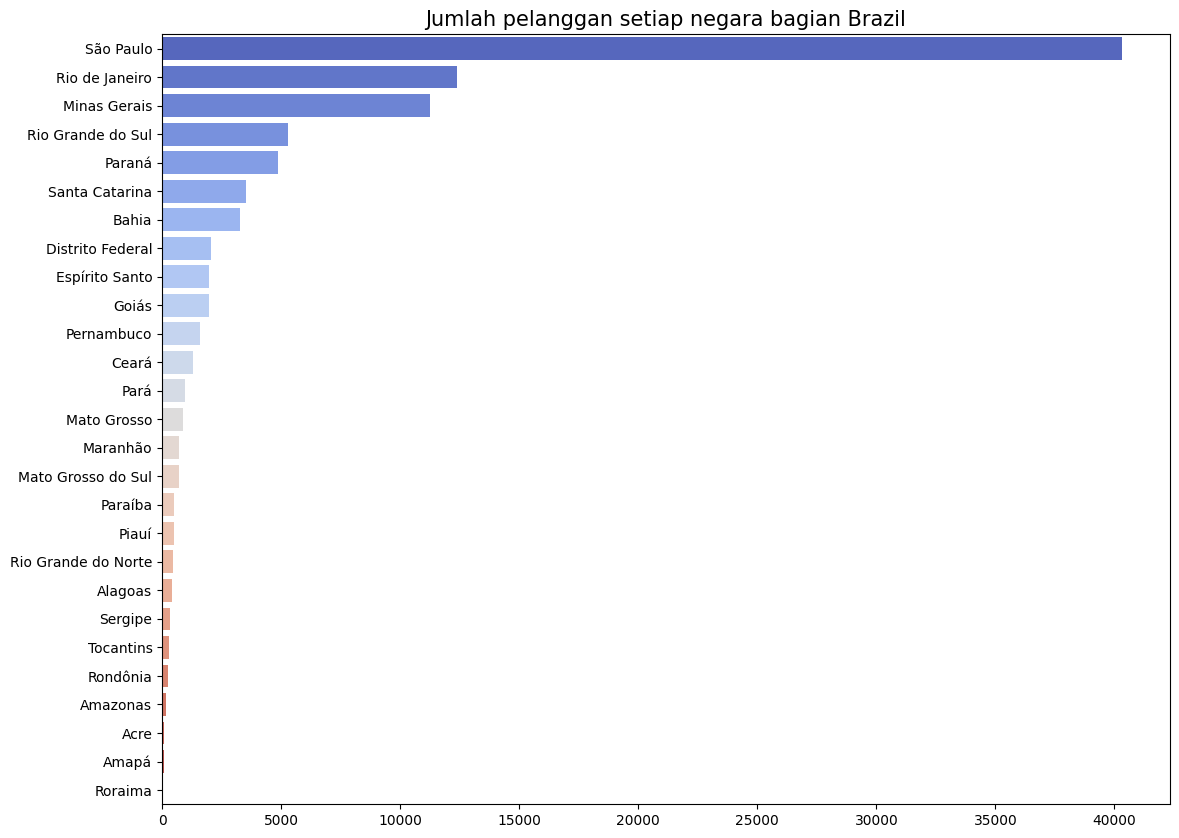

In [69]:
plt.figure(figsize=(13,10))
sns.barplot(x="customer_count", y="full_customer_state", data=customer_state, hue="full_customer_state", legend=False,palette="coolwarm")
plt.xlabel(None)
plt.ylabel(None)
plt.title("Jumlah pelanggan setiap negara bagian Brazil", fontsize=15);

### Pertanyaan 2: Pendapatan Olist perbulan setiap tahunnya

In [70]:
# Resample untuk membuat data ditampilkan berdasarkan bulan yang datanya diambil melalui kolom order_approved_at
monthly_per_year = all_df.resample(rule="ME", on="order_approved_at").agg({
    "order_id": "nunique",
    "price": "sum"
})

# Mengubah format penanggalannya
monthly_per_year.index = monthly_per_year.index.strftime("%B %Y")

# Mereset index agar order_approved_at menjadi kolom
monthly_per_year.reset_index(inplace=True)

# Melakukan rename kolom agar lebih sesuai dengan kontennya
monthly_per_year.rename(columns={
    "order_id":"order_count",
    "price":"revenue"
}, inplace=True)

monthly_per_year.sort_values(by="revenue", ascending=False)

,order_approved_at,order_count,revenue
20,May 2018,6903,994642.27
14,November 2017,7051,959192.29
18,March 2018,6963,946944.05
19,April 2018,6574,945709.01
16,January 2018,6825,896867.53
23,August 2018,6472,858417.89
21,June 2018,6073,857009.77
22,July 2018,6001,844129.09
17,February 2018,6429,806106.32
15,December 2017,5543,731699.06


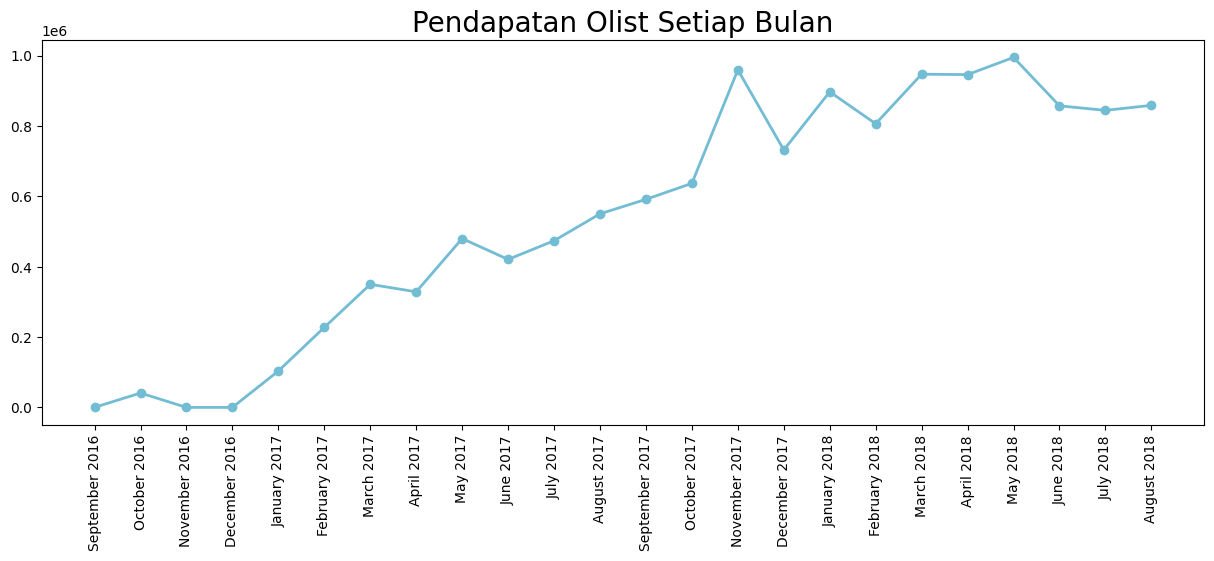

In [71]:
plt.figure(figsize=(15,5))
plt.plot(monthly_per_year["order_approved_at"],
         monthly_per_year["revenue"],
         marker="o",
         linewidth=2, 
         color="#72BCD4"
        );
plt.xticks(rotation=90)
plt.title("Pendapatan Olist Setiap Bulan", loc="center", fontsize=20)
plt.show();

### Pertanyaan 3: 5 Kategori barang yang paling banyak dan sedikit dibeli 

In [72]:
category_df = all_df.groupby("product_category_name_english").agg({
    "order_id":"nunique"
}).sort_values(by="order_id", ascending=False).reset_index()

category_df.rename(columns={
    "order_id":"order_count",
    "product_category_name_english":"category_name"
}, inplace=True)

category_df

,category_name,order_count
0,bed_bath_table,9272
1,health_beauty,8649
2,sports_leisure,7530
3,computers_accessories,6529
4,furniture_decor,6306
...,...,...
66,arts_and_craftmanship,23
67,la_cuisine,13
68,cds_dvds_musicals,12
69,fashion_childrens_clothes,7


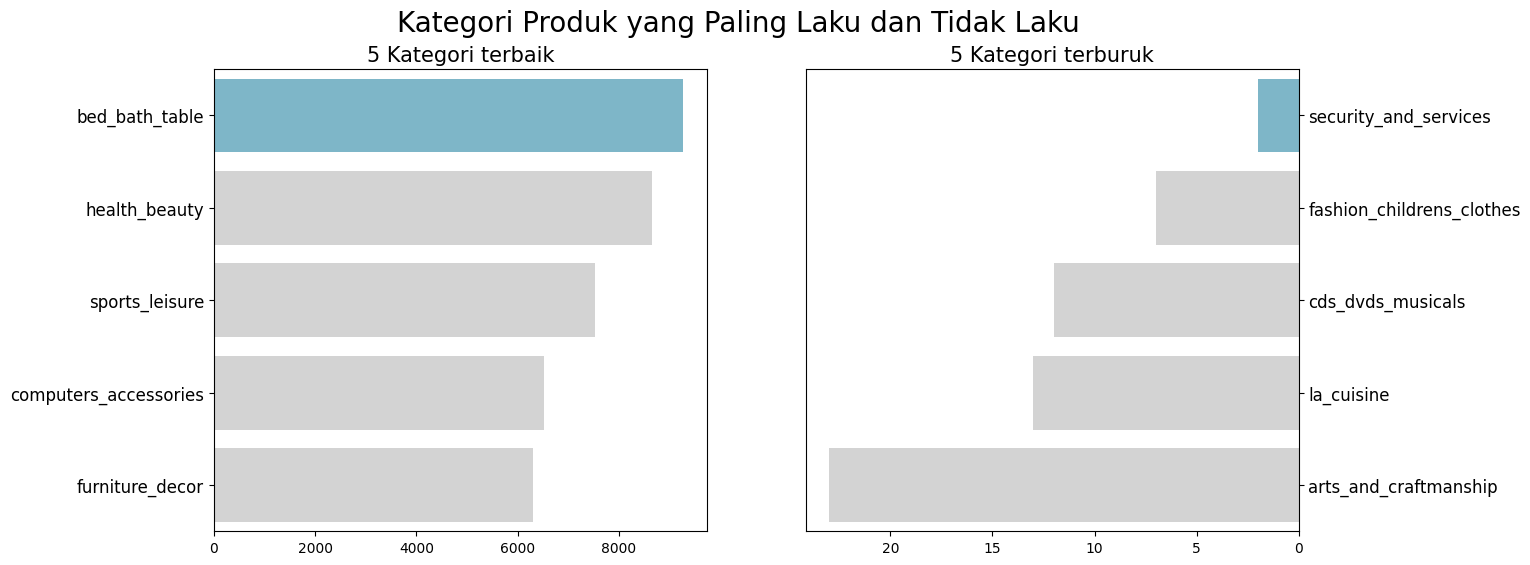

In [73]:
fig, axs = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(14,6)
)

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_count", y="category_name", data=category_df.head(5), hue="category_name", legend=False,palette=colors, ax=axs[0])
axs[0].set_ylabel(None)
axs[0].set_xlabel(None)
axs[0].set_title("5 Kategori terbaik", loc="center", fontsize=15)
axs[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="order_count", y="category_name", data=category_df.sort_values(by="order_count", ascending=True).head(5), hue="category_name", legend=False, palette=colors, ax=axs[1])
axs[1].set_ylabel(None)
axs[1].set_xlabel(None)
axs[1].invert_xaxis()
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].set_title("5 Kategori terburuk", loc="center", fontsize=15)
axs[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Kategori Produk yang Paling Laku dan Tidak Laku", fontsize=20)
plt.show()

### Pertanyaan 4: Pengaruh jumlah gambar pada halaman produk terhadap jumlah pembelian

In [74]:
all_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'full_customer_state',
       'product_category_name_english'],
      dtype='object')

In [75]:
pict_order = all_df.groupby("product_photos_qty").agg({
    "order_id":"nunique"
}).sort_values(by="order_id", ascending=False).reset_index()

pict_order.rename(columns={
    "order_id":"order_count",
}, inplace=True)

pict_order["product_photos_qty"] = pict_order["product_photos_qty"].astype(int)
pict_order

,product_photos_qty,order_count
0,1,47351
1,2,19049
2,3,11192
3,4,7554
4,5,4979
5,6,3400
6,7,1407
7,8,684
8,10,318
9,9,286


In [76]:
def scatter_vis(x, y, data, title=None,xlabel=None,ylabel=None, fontsize=20, xticks=None):
    plt.figure(figsize=(12,4))
    plt.scatter(x=x,y=y, data=data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontsize=20)
    plt.xticks(xticks)
    plt.show()

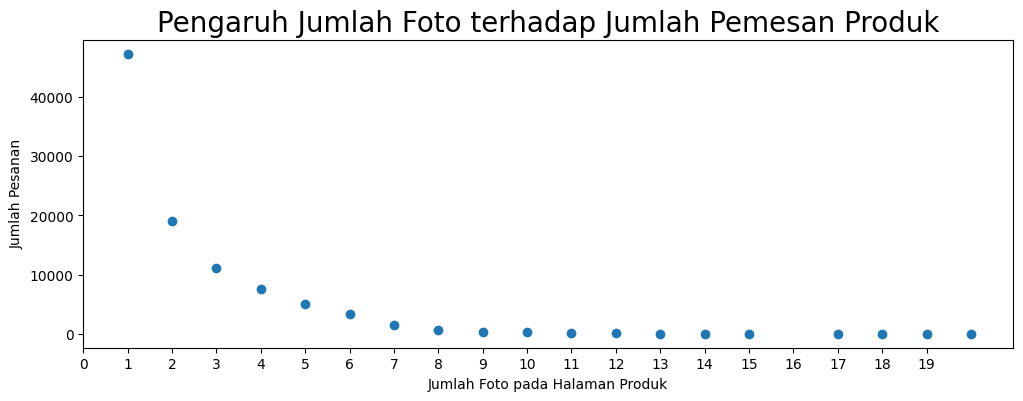

In [77]:
scatter_vis(x="product_photos_qty", 
              y="order_count", 
              data=pict_order,
              title="Pengaruh Jumlah Foto terhadap Jumlah Pemesan Produk",
              xlabel="Jumlah Foto pada Halaman Produk",
              ylabel="Jumlah Pesanan",
              xticks=np.arange(0, pict_order["product_photos_qty"].max(),1)
             )

### Pertanyaan 5: Pengaruh jumlah kata pada deskripsi produk terhadap jumlah pembelian

In [78]:
desc_order = all_df.groupby("product_description_lenght").agg({
    "order_id":"nunique"
}).sort_values(by="order_id", ascending=False).reset_index()

desc_order.rename(columns={
    "order_id":"order_count",
}, inplace=True)

desc_order["product_description_lenght"] = desc_order["product_description_lenght"].astype(int)
desc_order

,product_description_lenght,order_count
0,1893,580
1,341,551
2,492,529
3,245,507
4,903,475
...,...,...
2939,2686,1
2940,1577,1
2941,2679,1
2942,2668,1


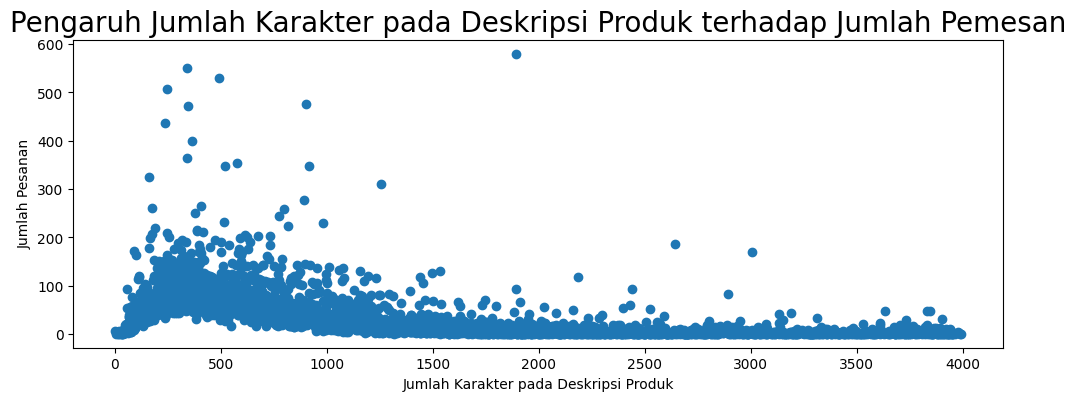

In [79]:
scatter_vis(y="order_count", 
            x="product_description_lenght", 
            data=desc_order,
            title="Pengaruh Jumlah Karakter pada Deskripsi Produk terhadap Jumlah Pemesan",
            xlabel="Jumlah Karakter pada Deskripsi Produk",
            ylabel="Jumlah Pesanan",
           )

### Tambahan - RFM Analysis

RFM Analysis merupakan metode yang digunakan untuk melakukan segmentasi customer kedalam beberapa parameter, yaitu: 
- Recency : Parameter untuk melihat kapan terakhir kali customer melakukan transaksi
- Frequency : Parameter untuk melihat seberapa sering pelanggan melakukan transaksi
- Monetary : Parameter untuk melihat seberapa besar pendapatan dari suatu pelanggan

Dengan ketiga informasi tersebut, kita dapat menentukan pelanggan manakah yang memiliki peran pentig bagi suatu perusahaan.

In [80]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_approved_at": "max", # Untuk mengambil tanggal order terakhir
    "order_id": "nunique", # Untuk menghitung jumlah order
    "price": "sum" # Untuk menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]

# Menghitung kapan terakhir customer melakukan transaksi
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = new_olist_orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,114
2,0000f46a3911fa3c0805444483337064,1,69.00,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,321
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,288


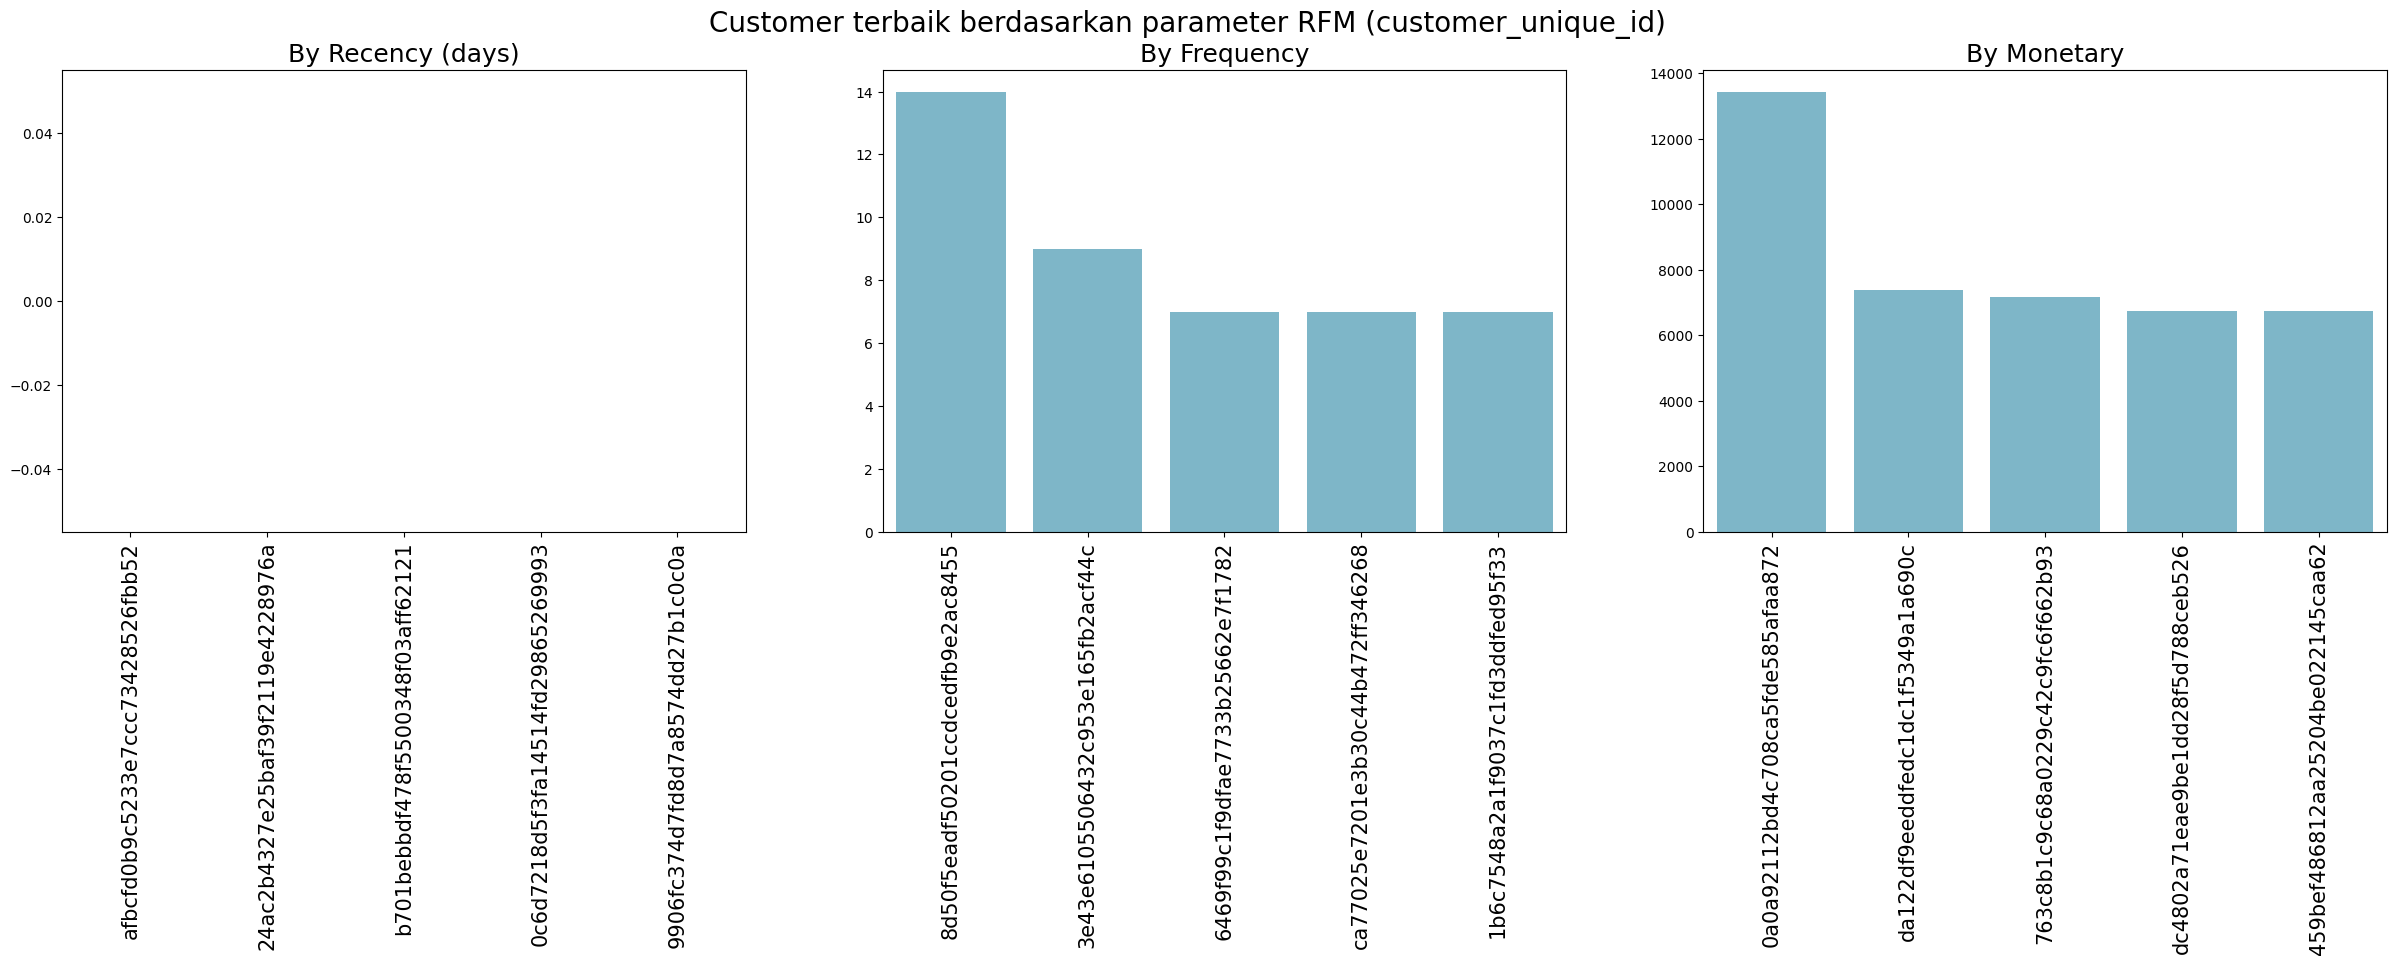

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), hue="customer_unique_id", legend=False, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=90)
 
sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), hue="customer_unique_id", legend=False, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=90)
 
sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), hue="customer_unique_id", legend=False, palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=90)
 
plt.suptitle("Customer terbaik berdasarkan parameter RFM (customer_unique_id)", fontsize=20)
plt.show()

Pada chart recency, tidak terdapat data apapun sebab memang ini merupakan dataset tahun 2016-2018. Sehingga tidak terdapat history customer dalam rentang beberapa hari yang lalu.

Lalu berikut adalah data customer yang memiliki frekuensi pemesanan tertinggi

In [82]:
rfm_df[rfm_df["frequency"] == rfm_df["frequency"].max()]

,customer_unique_id,frequency,monetary,recency
50737,8d50f5eadf50201ccdcedfb9e2ac8455,14,644.73,9


Lalu berikut adalah data customer yang memiliki nilai monetary tertinggi

In [83]:
rfm_df[rfm_df["monetary"] == rfm_df["monetary"].max()]

,customer_unique_id,frequency,monetary,recency
3676,0a0a92112bd4c708ca5fde585afaa872,1,13440.0,331


## Conclusion

### `Kesimpulan pertanyaan 1` - Jumlah persebaran pelanggan berdasarkan negara bagiannya
Seperti yang sudah dilihat pada visualisasi diatas bahwa negara bagian São Paulo menjadi yang tertinggi dan Roraima memiliki jumlah pemesan paling sedikit.

### `Kesimpulan pertanyaan 2` - Pendapatan Olist perbulan setiap tahunnya
Berdasarkan informasi yang diperoleh bahwa pendapatan Olist semakin meningkat setiap bulannya dalam rentang tahun 2016-2017 dan pendapatan tertinggi dalam rentang tahun 2016-2018 terjadi dibulan May tahun 2018. 

Lalu setelah memasuki bulan Januari tahun 2018, pendapatan Olist mulai stabil di angka 800,000 BRL hingga 1,000,000 BRL (Brazilian Real). 

### `Kesimpulan pertanyaan 3` - Apa saja 5 Kategori Barang yang paling banyak disukai dan tidak disukai
Dari hasil analisis, 5 kategori dengan pemesan terbanyak adalah:
1. `bed_bath_table` dengan total pemesan sebanyak 9272
2. `health_beauty` dengan total pemesan sebanyak 8649
3. `sports_leisure` dengan total pemesan sebanyak 7530
4. `computers_accessories` dengan total pemesan sebanyak 6529
5. `furniture_decor` dengan total pemesan sebanyak 6306

Dan 5 kategori dengan pemesan paling sedikit adalah:
1. `arts_and_craftmanship` dengan total pemesan sebanyak 23
2. `la_cuisine` dengan total pemesan sebanyak 13
3. `cds_dvds_musicals` dengan total pemesan sebanyak 12
4. `fashion_childrens_clothes` dengan total pemesan sebanyak 7
5. `security_and_services` dengan total pemesan sebanyak 2

Dari data tersebut, kita dapat mengetahui kategori apa yang bisa menjadi patokan agar produk yang kita tawarkan bisa mendapatkan banyak pembeli

### `Kesimpulan pertanyaan 4 dan 5` - Apakah jumlah foto pada produk dan jumlah karakter pada deskripsi mempengaruhi banyaknya jumlah pembeli?

Banyaknya foto produk tampaknya memiliki pengaruh, seperti yang dapat dilihat dari analisis bahwa semakin dikit foto yang dipasang bisa saja membuat jumlah pembeli semakin banyak, namun tentunya masih banyak faktor yang dapat mempengaruhi jumlah pembeli.   

Dan untuk banyaknya karakter pada deskripsi / panjang deskripsi yang terdapat pada produk tidak terlalu berpengaruh terhadap jumlah pembeli. Namun jumlah karakter sekitar 100 hingga 700 karakter bisa membuat produk lebih diminati

### `Kesimpulan pada RFM Analysis`
Dari data yang telah didapatkan terdapat hal-hal yang harus menjadi perhatian, yaitu: 
- Parameter recency : Seperti yang diketahui bahwa tidak terdapat data yang disebabkan dataset yang digunakan adalah dataset yang diambil dari tahun 2016-2018 sehingga tidak terdapat riwayat pemesanan beberapa hari kebelakang.
- Parameter Frequency : Pada parameter ini, customer dengan unique_id `8d50f5eadf50201ccdcedfb9e2ac8455` memiliki frekuensi pemesanan tertinggi yaitu **14 kali pemesanan** dan total uang yang sudah dikeluarkan sebesar **644.73 Brazilian Real**
- Parameter Monetary : Pada parameter ini, customer dengan unique_id `0a0a92112bd4c708ca5fde585afaa872` memiliki jumlah monetary tertinggi yaitu **13440.0 Brazilian Real** namun customer ini hanya memiliki frequency pemesanan `1` kali

## Saran

Masih terdapat banyak hal yang dapat di analisis dalam project ini seperti:
1. Melihat berapa lama rata-rata pengiriman pesanan yang terjadi
2. Melakukan geoanalysis untuk melihat apakah ada pengaruh antara letak geografis dengan banyaknya pembeli. Sebab terdapat dataset geolocation yang tersedia pada website kaggle [Klik untuk melihat website](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)
3. Melakukan analisis terhadap penjual
4. Melihat apakah review dapat berpengaruh terhadap minat beli customer. Sebab terdapat dataset yang berisi tentang analisis yang dapat dilihat di website kaggle.
5. Melihat lebih dalam lagi apa yang menyebabkan bulan May 2018 memiliki nilai pendapatan tertinggi

# Final - Export all_csv file

In [84]:
all_df.to_csv("./dashboard/main_data.csv",index=None)